In [1]:
1+1

2

In [12]:
# %pip install yfinance pandas seaborn matplotlib numpy statsmodels scipy scikit-learn dtale ipykernel ipywidgets bokeh jupyter_bokeh

In [20]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import dtale
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
output_notebook()

# download the data
df = yf.download('^GSPC', '1931-01-01', '2024-03-28')

df['Day']= df.index

# convert the datetime index to ordinal values, which can be used to plot a regression line
df.index = df.index.map(pd.Timestamp.toordinal)

# Logarithmic transformation (assuming positive 'Close' values)
df['Log_AClose'] = np.log(df['Adj Close'])  

display(df.iloc[:, :])


Loading BokehJS ...

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Day,Log_AClose
Date,,,,,,,,
704919,15.850000,15.850000,15.850000,15.850000,15.850000,0,1931-01-02,2.763170
704922,15.930000,15.930000,15.930000,15.930000,15.930000,0,1931-01-05,2.768204
704923,16.129999,16.129999,16.129999,16.129999,16.129999,0,1931-01-06,2.780681
704924,15.090000,15.090000,15.090000,15.090000,15.090000,0,1931-01-07,2.714032
704925,16.230000,16.230000,16.230000,16.230000,16.230000,0,1931-01-08,2.786861
...,...,...,...,...,...,...,...,...
738966,5253.430176,5261.100098,5240.660156,5241.529785,5241.529785,4207730000,2024-03-21,8.564369
738967,5242.479980,5246.089844,5229.870117,5234.180176,5234.180176,3374700000,2024-03-22,8.562966
738970,5219.520020,5229.089844,5216.089844,5218.189941,5218.189941,3331360000,2024-03-25,8.559906


S&P

In [21]:
# convert the regression line start date to ordinal
x1 = pd.to_datetime('1932-01-01').toordinal()

# data slice for the regression line
data=df.loc[x1:].reset_index()

display(data.iloc[:, :])

# create a linear regression model
model = LinearRegression()

# fit the model
model.fit(data[['Date']], data['Log_AClose'])

# make predictions
data['Linear'] = model.predict(data[['Date']])
data['Prediction'] = np.exp(data['Linear'])

#print the model details including the slope, intercept, r-squared, and p-value, etc.
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)
print('R-squared:', model.score(data[['Date']], data['Log_AClose']))

print('The equation of the regression line is: Log_AClose =', model.coef_[0], '* Date +', model.intercept_)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Log_AClose
0,705286,7.560000,7.560000,7.560000,7.560000,7.560000,0,1932-01-04,2.022871
1,705287,7.550000,7.550000,7.550000,7.550000,7.550000,0,1932-01-05,2.021548
2,705288,8.080000,8.080000,8.080000,8.080000,8.080000,0,1932-01-06,2.089392
3,705289,8.220000,8.220000,8.220000,8.220000,8.220000,0,1932-01-07,2.106570
4,705290,8.570000,8.570000,8.570000,8.570000,8.570000,0,1932-01-08,2.148268
...,...,...,...,...,...,...,...,...,...
23167,738966,5253.430176,5261.100098,5240.660156,5241.529785,5241.529785,4207730000,2024-03-21,8.564369
23168,738967,5242.479980,5246.089844,5229.870117,5234.180176,5234.180176,3374700000,2024-03-22,8.562966
23169,738970,5219.520020,5229.089844,5216.089844,5218.189941,5218.189941,3331360000,2024-03-25,8.559906
23170,738971,5228.850098,5235.160156,5203.419922,5203.580078,5203.580078,3871790000,2024-03-26,8.557102


Slope: 0.00019017723020905912
Intercept: -132.2801903074966
R-squared: 0.9777985283548669
The equation of the regression line is: Log_AClose = 0.00019017723020905912 * Date + -132.2801903074966


Create a linear regression to Log_Aclose and 

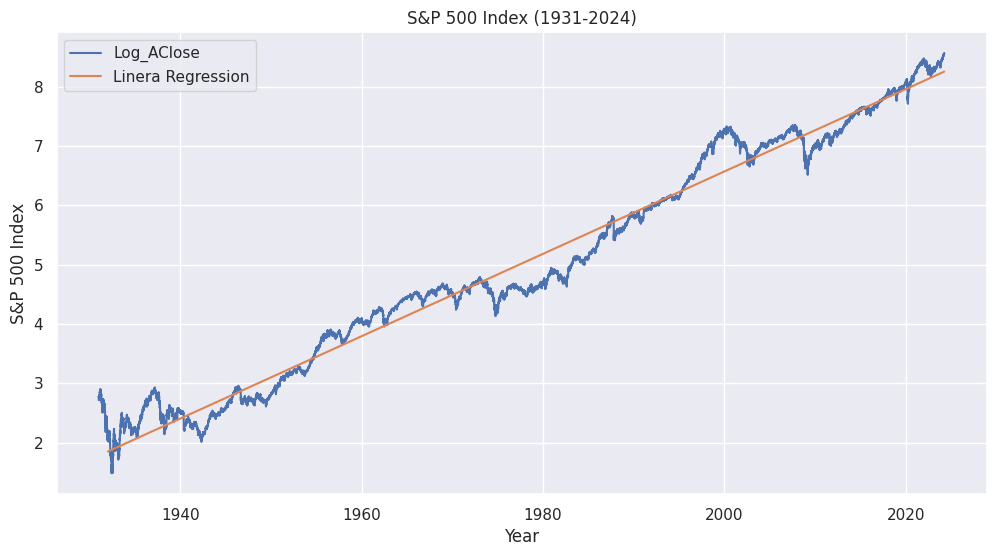

In [22]:


# plot the Log_AClose and the regression line using seaborn
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Log_AClose', data=df, label='Log_AClose')
sns.lineplot(x='Day', y='Linear', data=data, label='Linera Regression')
plt.title('S&P 500 Index (1931-2024)')
plt.xlabel('Year')
plt.ylabel('S&P 500 Index')
plt.legend()
plt.show()





In [23]:
# # plot the data and the regression line in bokeh
# source = ColumnDataSource(data)

# p = figure(x_axis_type='datetime', title='S&P 500 Index', x_axis_label='Date', y_axis_label='Price', width=1200, height=700)
# p.line(x='Date', y='Adj Close', source=source, line_width=2, color='blue', legend_label='Actual')
# p.line(x='Date', y='Prediction', source=source, line_width=2, color='red', legend_label='Prediction')
# p.legend.location = 'top_left'
# show(p)

Using bokeh to create dynamic plot

In [24]:
from bokeh.models import HoverTool, CrosshairTool
from bokeh.io import curdoc


# plot the data and the regression line in bokeh
source = ColumnDataSource(data)

# create a new figure
p_dynamic = figure(x_axis_type='datetime', title='S&P 500 Index', x_axis_label='Date', y_axis_label='Price', width=1200, height=700)

# plot the actual data
p_dynamic.line(x='Date', y='Log_AClose', source=source, line_width=2, color='blue', legend_label='Log_AClose')

# plot the prediction data
p_dynamic.line(x='Date', y='Linear', source=source, line_width=2, color='red', legend_label='Linear')

# add hover functionality
hover_tool = HoverTool(tooltips=[('Date', '@Date{%F}'), ('Actual', '@{Adj Close}'), ('Prediction', '@Prediction')], formatters={'@Date': 'datetime'})
crosshair_tool = CrosshairTool(dimensions='both')
p_dynamic.add_tools(hover_tool, crosshair_tool)

curdoc().add_root(p_dynamic)  # Adding the figure to the current document

show(p_dynamic)  # Display the plot

We extend daily 20 years forward and predict 

In [25]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Log_AClose,Linear,Prediction
0,705286,7.560000,7.560000,7.560000,7.560000,7.560000,0,1932-01-04,2.022871,1.849148,6.354401
1,705287,7.550000,7.550000,7.550000,7.550000,7.550000,0,1932-01-05,2.021548,1.849338,6.355610
2,705288,8.080000,8.080000,8.080000,8.080000,8.080000,0,1932-01-06,2.089392,1.849528,6.356819
3,705289,8.220000,8.220000,8.220000,8.220000,8.220000,0,1932-01-07,2.106570,1.849718,6.358028
4,705290,8.570000,8.570000,8.570000,8.570000,8.570000,0,1932-01-08,2.148268,1.849908,6.359237
...,...,...,...,...,...,...,...,...,...,...,...
23167,738966,5253.430176,5261.100098,5240.660156,5241.529785,5241.529785,4207730000,2024-03-21,8.564369,8.254317,3844.184597
23168,738967,5242.479980,5246.089844,5229.870117,5234.180176,5234.180176,3374700000,2024-03-22,8.562966,8.254507,3844.915743
23169,738970,5219.520020,5229.089844,5216.089844,5218.189941,5218.189941,3331360000,2024-03-25,8.559906,8.255078,3847.110016
23170,738971,5228.850098,5235.160156,5203.419922,5203.580078,5203.580078,3871790000,2024-03-26,8.557102,8.255268,3847.841718


In [26]:
#We extend daily 20 years forward and predict the S&P 500 index using the linear regression model
# create a new dataframe for the future dates
future_dates = pd.date_range(start='2024-03-29', periods=20*365, freq='D')

# convert the future dates to ordinal
future_dates_od = future_dates.map(pd.Timestamp.toordinal)
print(future_dates_od)

# convert future_dates to a numpy array
future_dates_od_np = np.array(future_dates_od)
print(future_dates_od_np)

# make predictions for the future dates
future_predictions = model.predict(future_dates_od_np[:, np.newaxis])

# create a new dataframe for the future predictions
future_data = pd.DataFrame({'Date': future_dates, 'Prediction': future_predictions})

# convert the future dates to datetime starting from 2024-03-29
future_data['Date'] = pd.to_datetime(future_data['Date'], origin='unix', unit='D')



Index([738974, 738975, 738976, 738977, 738978, 738979, 738980, 738981, 738982,
       738983,
       ...
       746264, 746265, 746266, 746267, 746268, 746269, 746270, 746271, 746272,
       746273],
      dtype='int64', length=7300)
[738974 738975 738976 ... 746271 746272 746273]


/home/norayr/.pyenv/versions/3.12.0/envs/market/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [27]:
# Assuming `model` is your trained LinearRegression model
# and `X` is the data you want to make predictions on

X.columns = model.feature_names_in_
predictions = model.predict(X)

NameError: name 'X' is not defined

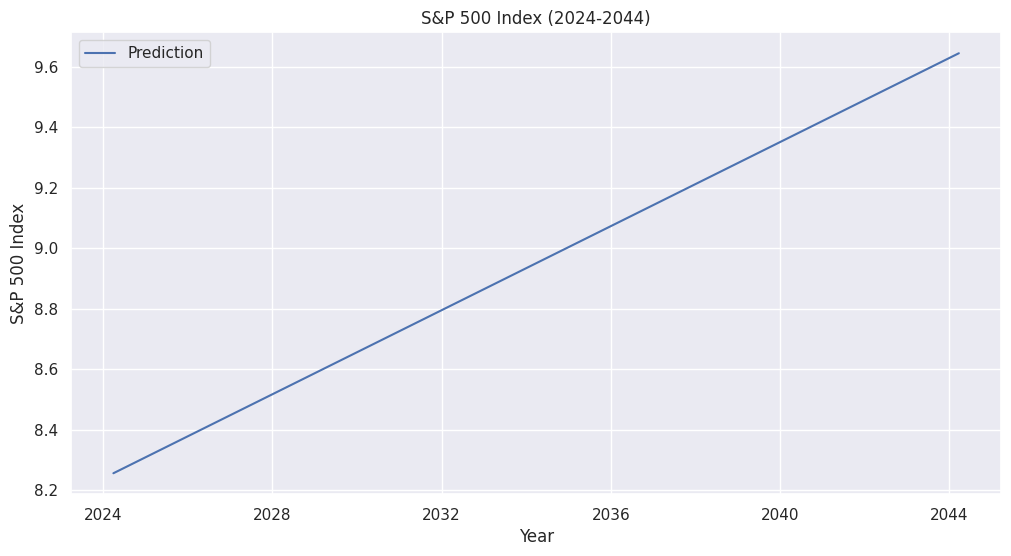

In [28]:
# plot the future predictions agaisnt the date using seaborn
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Prediction', data=future_data, label='Prediction')
plt.title('S&P 500 Index (2024-2044)')
plt.xlabel('Year')
plt.ylabel('S&P 500 Index')
plt.legend()
plt.show()


In [29]:
# D-Tale
d = dtale.show(df, host='localhost')   

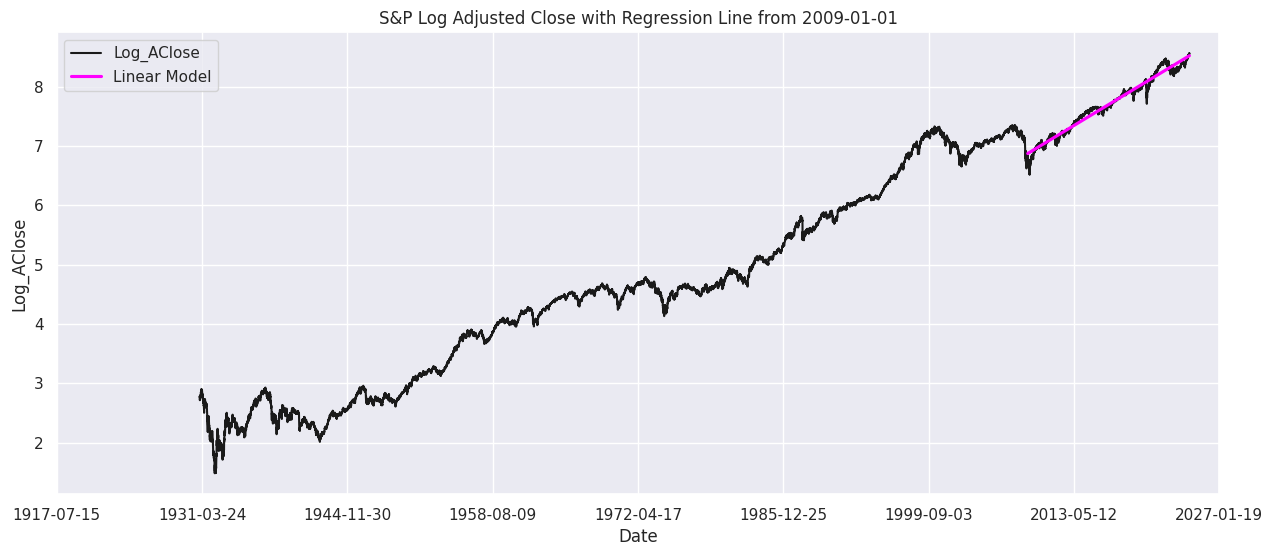

In [30]:


# convert the regression line start date to ordinal
x1 = pd.to_datetime('2009-01-01').toordinal()

# data slice for the regression line
data=df.loc[x1:].reset_index()

# plot the log Adj Close data
ax1 = df.plot(y='Log_AClose', c='k', figsize=(15, 6), grid=True, legend=False,
              title='S&P Log Adjusted Close with Regression Line from 2009-01-01')

# add a regression line
sns.regplot(data=data, x='Date', y='Log_AClose', ax=ax1, color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)

ax1.set_xlim(df.index[0], df.index[-1])

# convert the axis back to datetime
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)

ax1.legend()

plt.show()

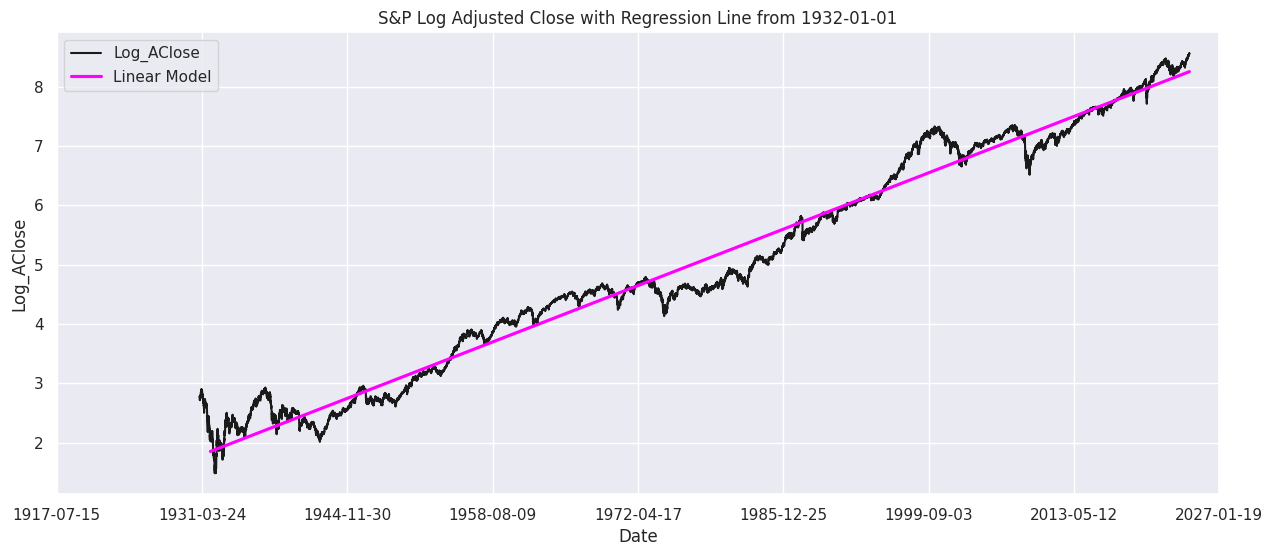

In [31]:

# convert the regression line start date to ordinal
x1 = pd.to_datetime('1932-01-01').toordinal()

# data slice for the regression line
data=df.loc[x1:].reset_index()

# plot the log Adj Close data
ax1 = df.plot(y='Log_AClose', c='k', figsize=(15, 6), grid=True, legend=False,
              title='S&P Log Adjusted Close with Regression Line from 1932-01-01')

# add a regression line
sns.regplot(data=data, x='Date', y='Log_AClose', ax=ax1, color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)

ax1.set_xlim(df.index[0], df.index[-1])

# convert the axis back to datetime
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)

ax1.legend()

plt.show()